# Creating word vectors with word2vec 

Creating word vectors

#### Load dependencies 

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Load Data 

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [5]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
len(gutenberg.fileids())

18

#### Tokenize text 

In [23]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [24]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [25]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [26]:
# tokenize a sentence
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [27]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [34]:
# inbuilt function to tokenize into sentences and not use the previous approach
gberg_sents = gutenberg.sents()

In [35]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [36]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [37]:
gberg_sents[4][14]

'father'

In [32]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [33]:
# total words in corpus
len(gutenberg.words())

2621613

#### Run word2vec 

In [38]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=3)

In [73]:
model.save('./nlp_data/raw_gutenberg_model.w2v')

####  Explore model

In [74]:
model = gensim.models.Word2Vec.load('./nlp_data/raw_gutenberg_model.w2v')

In [75]:
len(model.wv.vocab)

17011

In [41]:
model['dog']

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.19456539, -0.06849617,  0.1013549 , -0.37429863, -0.24039951,
        0.46937585,  0.38404515,  0.78839606,  0.16061556,  0.5681702 ,
       -0.18467256, -0.02377644, -0.2468948 , -0.08587088,  0.04945122,
        0.11930672, -0.05028511, -0.5352497 ,  0.13172193, -0.30386445,
        0.1812111 , -0.18221001, -0.39768896,  0.06769419, -0.0944171 ,
       -0.26877946,  0.25694588, -0.36427534,  0.36023736, -0.25056323,
        0.1318262 , -0.21765281, -0.33522204,  0.17046829, -0.11560151,
       -0.24921116, -0.07049549, -0.10111749, -0.28594887, -0.7946665 ,
       -0.21704413,  0.323653  , -0.37730432,  0.09612355,  0.43394968,
        0.07154358, -0.15716177,  0.02043526, -0.17517813, -0.0600847 ,
       -0.00467469, -0.29132771, -0.15418091,  0.24717858,  0.22565338,
       -0.04446309,  0.12095173, -0.26757655,  0.63706875, -0.36153305,
        0.12022467,  0.29033408, -0.10907764, -0.00970861], dtype=float32)

In [42]:
len(model['dog'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

In [43]:
model.most_similar('dog')

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('puppy', 0.8395730257034302),
 ('sweeper', 0.7910867929458618),
 ('pet', 0.773167610168457),
 ('cage', 0.7704716920852661),
 ('lazy', 0.7635625004768372),
 ('pig', 0.7516539096832275),
 ('broth', 0.7510323524475098),
 ('chimney', 0.7479075193405151),
 ('string', 0.7413297891616821),
 ('wid', 0.7348235845565796)]

In [44]:
model.most_similar('think')

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suppose', 0.8713130950927734),
 ('contradict', 0.8336503505706787),
 ('downright', 0.8147578239440918),
 ('manage', 0.8144857883453369),
 ('marries', 0.8003581166267395),
 ('know', 0.7992393970489502),
 ('hesitate', 0.7959119081497192),
 ('argue', 0.7958521842956543),
 ('believe', 0.795135498046875),
 ('vastly', 0.7944450378417969)]

In [45]:
model.most_similar('day')

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('morning', 0.7698721289634705),
 ('night', 0.7593055963516235),
 ('time', 0.7301796674728394),
 ('month', 0.7137991189956665),
 ('evening', 0.7061671018600464),
 ('feasting', 0.6729110479354858),
 ('Saturday', 0.6602204442024231),
 ('watch', 0.6594349145889282),
 ('week', 0.6543569564819336),
 ('fourteenth', 0.6479157209396362)]

In [46]:
model.most_similar('father')

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.875905454158783),
 ('brother', 0.8327921032905579),
 ('sister', 0.8234067559242249),
 ('daughter', 0.7711167335510254),
 ('Amnon', 0.7618520259857178),
 ('wife', 0.7610612511634827),
 ('uncle', 0.7271096706390381),
 ('Dinah', 0.725049614906311),
 ('bondwoman', 0.724211573600769),
 ('concubine', 0.7237937450408936)]

In [47]:
model.doesnt_match("mother father daughter dog".split())

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'dog'

In [48]:
model.similarity('father', 'dog')

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.45753071836770964

In [49]:
model.most_similar(positive=['father', 'woman'],negative=['man'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sister', 0.7829968929290771),
 ('mother', 0.7704154253005981),
 ('husband', 0.749883770942688),
 ('daughter', 0.742501437664032),
 ('wife', 0.7284777164459229),
 ('brother', 0.70851731300354),
 ('Sarai', 0.6858751773834229),
 ('Rachel', 0.67987060546875),
 ('Sarah', 0.6776793003082275),
 ('elder', 0.669314980506897)]

In [50]:
model.most_similar(positive=['son', 'woman'],negative=['man'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Bethuel', 0.7210085988044739),
 ('Leah', 0.7174800038337708),
 ('daughter', 0.7159296870231628),
 ('Sarai', 0.7130635976791382),
 ('Hagar', 0.7115534543991089),
 ('Sarah', 0.7093472480773926),
 ('wife', 0.7074151039123535),
 ('Abram', 0.6932141184806824),
 ('Rachel', 0.6931759119033813),
 ('Bilhah', 0.6906157732009888)]

In [51]:
model.most_similar(positive=['husband', 'woman'],negative=['man'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wife', 0.7334594130516052),
 ('sister', 0.7167555689811707),
 ('mother', 0.6812826991081238),
 ('daughter', 0.6650420427322388),
 ('conceived', 0.6605169773101807),
 ('nurse', 0.6466900110244751),
 ('child', 0.6453026533126831),
 ('maid', 0.633763313293457),
 ('widow', 0.6328712105751038),
 ('elder', 0.6283228993415833)]

In [53]:
model.most_similar(positive=['king', 'woman'],negative=['man'], topn=30)

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Sarah', 0.7188663482666016),
 ('Rachel', 0.7118053436279297),
 ('Solomon', 0.6978154182434082),
 ('Leah', 0.6779390573501587),
 ('Sarai', 0.6728357672691345),
 ('Hagar', 0.6723554134368896),
 ('Abram', 0.6624486446380615),
 ('Laban', 0.6574832201004028),
 ('queen', 0.656984806060791),
 ('Bethuel', 0.6560900211334229),
 ('Judah', 0.6530834436416626),
 ('birthright', 0.6492928266525269),
 ('daughter', 0.6482851505279541),
 ('Rebekah', 0.6459969282150269),
 ('princes', 0.6455344557762146),
 ('Hamor', 0.6451106071472168),
 ('Ephron', 0.639814019203186),
 ('David', 0.6389772891998291),
 ('damsel', 0.6380876302719116),
 ('Bilhah', 0.638003408908844),
 ('Mephibosheth', 0.637776255607605),
 ('Zilpah', 0.6364313364028931),
 ('Padanaram', 0.6334853172302246),
 ('kindred', 0.6318686008453369),
 ('magicians', 0.624371349811554),
 ('Shechem', 0.62069171667099),
 ('Absalom', 0.6171888113021851),
 ('Heth', 0.6160181164741516),
 ('Lot', 0.6158955693244934),
 ('Uriah', 0.6148667931556702)]

#### Reduce word vector dimensionality with t-SNE

 t-SNE = t distributed stochastic neighbor embedding
 
 it allows us to convert each of the words in our vocabulary from 64 dimensional (higher) space into a smaller one 

In [55]:
len(model.wv.vocab) # the number of words in our vocabulary

17011

In [56]:
X = model[model.wv.vocab]

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [58]:
tsne = TSNE(n_components=2, n_iter=1000)

In [59]:
X_2d = tsne.fit_transform(X)

In [60]:
# converting the previous tsne transformed 2d object into a dataframe
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [61]:
coords_df.head()

,x,y,token
0,17.999620,12.756596,theoretic
1,-32.177143,-1.556392,Live
2,-17.118746,-50.146919,congregation
3,-24.513222,37.437122,papa
4,38.209736,-6.742644,tap


In [62]:
coords_df.to_csv('./nlp_data/raw_gutenberg_tsne.csv', index=False)

#### Visualize 2d representation of word vectors 

In [63]:
coords_df = pd.read_csv('./nlp_data/raw_gutenberg_tsne.csv')

In [65]:
coords_df.head(20)

,x,y,token
0,17.999620,12.756596,theoretic
1,-32.177143,-1.556392,Live
2,-17.118746,-50.146920,congregation
3,-24.513222,37.437122,papa
4,38.209736,-6.742644,tap
5,11.605226,21.077951,lawsuit
6,-4.277553,-6.466354,attributes
7,14.737158,28.644700,meditations
8,-3.077445,2.324025,owning
9,5.238394,50.569706,excite


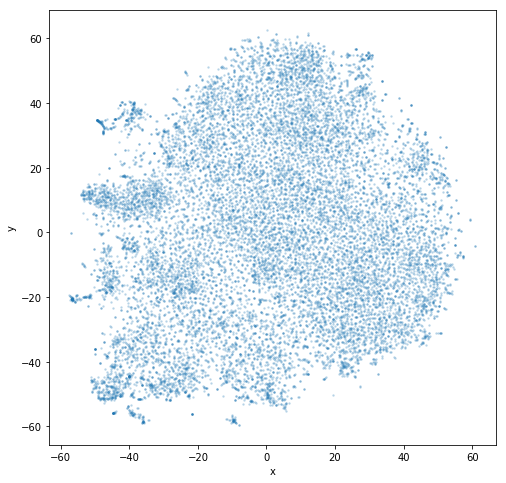

In [67]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8, 8), marker='.', s=10, alpha=0.2)

In [68]:
output_notebook()

Loading BokehJS ...

In [69]:
subset_df = coords_df.sample(n=5000)

In [70]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y = subset_df.y, text=subset_df.token)

In [72]:
show(p)